# Invoking the CDS API to download the datasets

In [2]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': [
            '2m_temperature', 'total_precipitation', 'volumetric_soil_water_layer_1',
        ],
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    'download.nc')

2020-11-20 13:31:13,884 INFO Welcome to the CDS
2020-11-20 13:31:13,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-11-20 13:31:14,210 INFO Request is completed
2020-11-20 13:31:14,215 INFO Downloading http://136.156.133.42/cache-compute-0014/cache/data0/adaptor.mars.internal-1605854692.2744412-32736-25-40d66007-a906-4b00-a7be-a2c9290a9df6.nc to download.nc (1.1G)
2020-11-20 14:27:10,195 INFO Download rate 350.9K/s                                                                    


Result(content_length=1205972888,content_type=application/x-netcdf,location=http://136.156.133.42/cache-compute-0014/cache/data0/adaptor.mars.internal-1605854692.2744412-32736-25-40d66007-a906-4b00-a7be-a2c9290a9df6.nc)

In [1]:
from netCDF4 import Dataset
import numpy as np

# Exploring the dataset using netCDF

In [2]:
#loading the netCDF file
data = Dataset("download.nc")

In [3]:
#printing the variable names
print(data.variables.keys())

odict_keys(['longitude', 'latitude', 'time', 't2m', 'tp', 'swvl1'])


In [4]:
#accessing the variables
lon = data.variables['longitude']
lat = data.variables['latitude']
time = data.variables['time']

In [5]:
print(lon)
print(lat)
print(time)

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (3600,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (1801,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of -2147483647 used


In [6]:
time_data = data.variables['time'][:]

In [7]:
print(time_data)

[1051164 1051188 1051212 1051236 1051260 1051284 1051308 1051332 1051356
 1051380 1051404 1051428 1051452 1051476 1051500 1051524 1051548 1051572
 1051596 1051620 1051644 1051668 1051692 1051716 1051740 1051764 1051788
 1051812 1051836 1051860 1051884]


In [8]:
lon_data = data.variables['longitude'][:]
lat_data = data.variables['latitude'][:]
print(lon_data)
print(lat_data)

[0.000e+00 1.000e-01 2.000e-01 ... 3.597e+02 3.598e+02 3.599e+02]
[ 90.   89.9  89.8 ... -89.8 -89.9 -90. ]


# Exploring dataset using xarray 

In [2]:
import xarray as xr
dat = xr.open_dataset("download.nc")

In [3]:
dat

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-20 06:45:23 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [27]:
df = dat.to_dataframe()
df

t2m            tp     swvl1
latitude longitude  time                                                   
 90.0    0.000000   2019-12-01 12:00:00         NaN           NaN       NaN
                    2019-12-02 12:00:00         NaN           NaN       NaN
                    2019-12-03 12:00:00         NaN           NaN       NaN
                    2019-12-04 12:00:00         NaN           NaN       NaN
                    2019-12-05 12:00:00         NaN           NaN       NaN
...                                             ...           ...       ...
-90.0    359.899994 2019-12-27 12:00:00  246.587769  8.350611e-05  0.206098
                    2019-12-28 12:00:00  249.062820  1.202524e-04  0.206098
                    2019-12-29 12:00:00  246.191711  7.450581e-09  0.206098
                    2019-12-30 12:00:00  247.661133  1.336634e-05  0.206098
                    2019-12-31 12:00:00  243.946350  7.450581e-09  0.206098

[200991600 rows x 3 columns]

(array([  321574.,  3954441., 14419857., 10647769., 10623027.,  6757909.,
         4377244.,  8346348.,  8174480.,   976104.]),
 array([221.28519, 230.93404, 240.58289, 250.23172, 259.88058, 269.52942,
        279.17825, 288.82712, 298.47595, 308.12482, 317.77365],
       dtype=float32),
 <BarContainer object of 10 artists>)

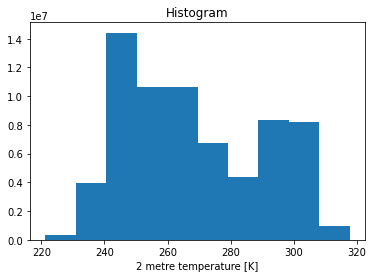

In [5]:
dat.t2m.plot()

By default xarray uses histogram to plot 2 metre temperature whose unit is in K
Since, there are more than 1 dimensions , so, histogram can be the default option for plotting

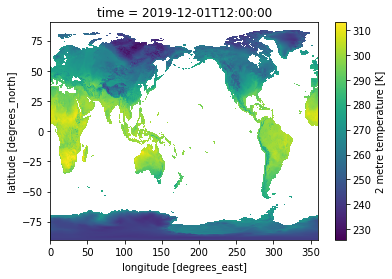

In [4]:
dat.isel(time=0).t2m.plot()

 We can visualize the 2m temperature on the first time data point for the given dataset

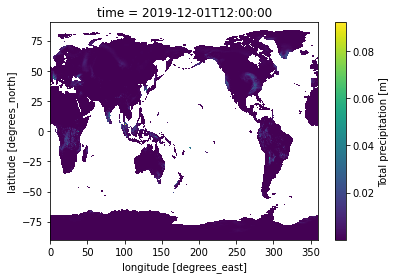

In [6]:
dat.isel(time=0).tp.plot()

Similarly we can see the total precipitation of the first time for our dataset for different longitudnal and different lattitudnal values

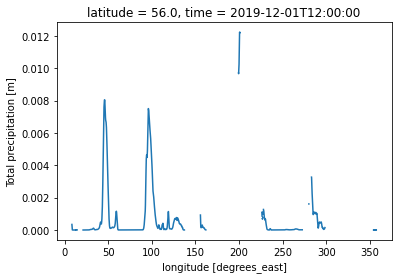

In [9]:
dat.isel(time=0).sel(latitude=56, method='nearest').tp.plot()

We can visualise the total precipitation for a particular latitude value

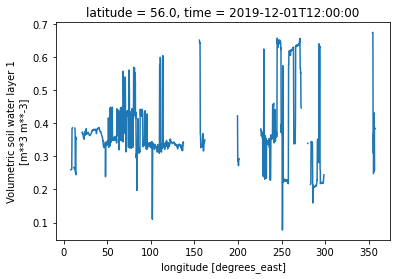

In [13]:
dat.isel(time=0).sel(latitude=56, method='nearest').swvl1.plot()

Similarly, we can also visualise the total Volumetric soil water layer 1 for this particular latitude value

In [16]:
dat.tp.mean()
dat.t2m.mean()
dat.swvl1.mean()

<xarray.DataArray 't2m' ()>
array(268.24347, dtype=float32)

The mean of the total precipitation ,2 metre temperature ,volumetric soil water layer 1 across all latitudes, longitudes and times is 0.0007 metre, 268.24 K ,0.264 m^3 respectively. We have reduced all the dimensions to a single number.

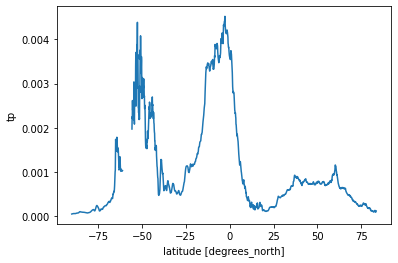

In [17]:
(dat.tp.mean(dim=['time', 'longitude'])).plot()

This is a variation to see how total precipitation changes across differing latitudes.
Here, we have fixed the the time and longitudnal dimensions to see the change of precipitation for different lattitude.
We can see that the total precipitation is high in the regions between the southpole and the equator.

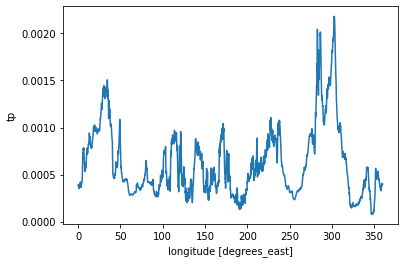

In [19]:
(dat.tp.mean(dim=['time', 'latitude'])).plot()

Similarly we can observe the pattern of hihgest precipitation for different longitudnal values

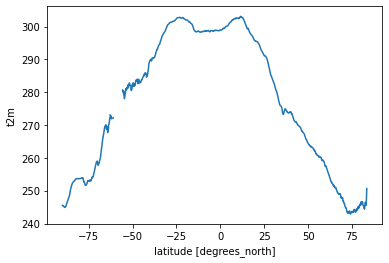

In [18]:
(dat.t2m.mean(dim=['time', 'longitude'])).plot()

The 2m temperature is high near the equatorial regions.

In [22]:
dat.tp.median()

<xarray.DataArray 'tp' ()>
array(1.6704202e-05, dtype=float32)

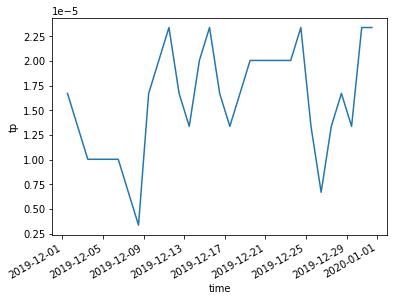

In [20]:
dat.tp.median(dim=['latitude', 'longitude']).plot()

 We can visualise the median precipitation across time

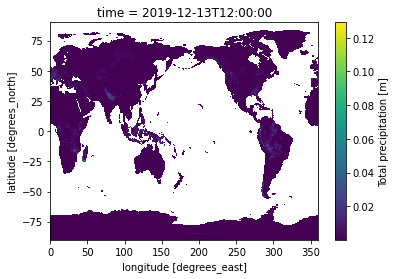

In [26]:
dat.sel(time='2019-12-13').tp.plot()